# 5. json 模块：处理 JSON 数据

[JSON (JavaScript Object Notation)](http://json.org) 是一种轻量级的数据交换格式，易于人阅读和编写，同时也易于机器解析和生成。

果我们要在不同的编程语言之间传递对象，就必须把对象序列化为标准格式，比如XML，但更好的方法是序列化为JSON，因为JSON表示出来就是一个字符串，可以被所有语言读取，也可以方便地存储到磁盘或者通过网络传输。JSON不仅是标准格式，并且比XML更快，而且可以直接在Web页面中读取，非常方便。


## 5.1 JSON 基础

`JSON` 的基础结构有两种：键值对 (`name/value pairs`) 和数组 (`array`)。

`JSON` 具有以下形式：

- `object` - 对象，用花括号表示，形式为（数据是无序的）：
    - `{ pair_1, pair_2, ..., pair_n }`
- `pair` - 键值对，形式为：
    - `string : value`
- `array` - 数组，用中括号表示，形式为（数据是有序的）：
    - `[value_1, value_2, ..., value_n ]`
- `value` - 值，可以是
    - `string` 字符串
    - `number` 数字
    - `object` 对象
    - `array` 数组
    - `true / false / null` 特殊值
- `string` 字符串

例子：

```json
{
    "name": "echo",
    "age": 24,
    "coding skills": ["python", "matlab", "java", "c", "c++", "ruby", "scala"],
    "ages for school": { 
        "primary school": 6,
        "middle school": 9,
        "high school": 15,
        "university": 18
    },
    "hobby": ["sports", "reading"],
    "married": false
}
```

JSON表示的对象就是标准的JavaScript语言的对象，JSON和Python内置的数据类型对应如下：

    JSON类型	Python类型
    -------------------
    {}	        dict
    []	        list
    "string"	  str
    1234.56	   int或float
    true/false	True/False
    null	      None

## 5.2 json模块的功能

json模块也提供了四个功能：dumps、dump、loads、load。

和pickle模块提供的功能几乎一样，这里不再做说明。

## 5.3 JSON 与 Python 的转换

假设我们已经将上面这个 `JSON` 对象写入了一个字符串：

In [7]:
import json
from pprint import pprint

info_string = """
{
    "name": "echo",
    "age": 24,
    "coding skills": ["python", "matlab", "java", "c", "c++", "ruby", "scala"],
    "ages for school": { 
        "primary school": 6,
        "middle school": 9,
        "high school": 15,
        "university": 18
    },
    "hobby": ["sports", "reading"],
    "married": false
}
"""

我们可以用 `json.loads()` (load string) 方法从字符串中读取 `JSON` 数据：

In [8]:
info = json.loads(info_string)

pprint(info)

{'age': 24,
 'ages for school': {'high school': 15,
                     'middle school': 9,
                     'primary school': 6,
                     'university': 18},
 'coding skills': ['python', 'matlab', 'java', 'c', 'c++', 'ruby', 'scala'],
 'hobby': ['sports', 'reading'],
 'married': False,
 'name': 'echo'}


此时，我们将原来的 `JSON` 数据变成了一个 `Python` 对象，在我们的例子中这个对象是个字典（也可能是别的类型，比如列表）：

In [3]:
type(info)

dict

可以使用 `json.dumps()` 将一个 `Python` 对象变成 `JSON` 对象：

In [9]:
info_json = json.dumps(info)

print(info_json)

{"name": "echo", "age": 24, "coding skills": ["python", "matlab", "java", "c", "c++", "ruby", "scala"], "ages for school": {"primary school": 6, "middle school": 9, "high school": 15, "university": 18}, "hobby": ["sports", "reading"], "married": false}


从中我们可以看到，生成的 `JSON` 字符串中，数组的元素顺序是不变的（始终是 `["python", "matlab", "java", "c", "c++", "ruby", "scala"]`），而对象的元素顺序是不确定的。

再看一个例子

In [2]:
import json
d = dict(name='Bob', age=20, score=88)
json.dumps(d)  # dumps()方法返回一个str，内容就是标准的JSON， 类似的，dump()方法可以直接把JSON写入一个file-like Object

'{"name": "Bob", "age": 20, "score": 88}'

要把JSON反序列化为Python对象，用loads()或者对应的load()方法，前者把JSON的字符串反序列化，后者从file-like Object中读取字符串并反序列化：

In [4]:
json_str = '{"age": 20, "score": 88, "name": "Bob"}'
json.loads(json_str)  

{'age': 20, 'name': 'Bob', 'score': 88}

由于JSON标准规定JSON编码是UTF-8，所以我们总是能正确地在Python的str与JSON的字符串之间转换。

## 5.4 生成和读取 JSON 文件

与 `pickle` 类似，我们可以直接从文件中读取 `JSON` 数据，也可以将对象保存为 `JSON` 格式。

- `json.dump(obj, file)` 将对象保存为 JSON 格式的文件
- `json.load(file)` 从 JSON 文件中读取数据

In [10]:
with open("info.json", "w") as f:
    json.dump(info, f)

可以查看 `info.json` 的内容：

In [12]:
with open("info.json") as f:
    print(f.read())

{"name": "echo", "age": 24, "coding skills": ["python", "matlab", "java", "c", "c++", "ruby", "scala"], "ages for school": {"primary school": 6, "middle school": 9, "high school": 15, "university": 18}, "hobby": ["sports", "reading"], "married": false}


从文件中读取数据：

In [13]:
with open("info.json") as f:
    info_from_file = json.load(f)
    
pprint(info_from_file)

{'age': 24,
 'ages for school': {'high school': 15,
                     'middle school': 9,
                     'primary school': 6,
                     'university': 18},
 'coding skills': ['python', 'matlab', 'java', 'c', 'c++', 'ruby', 'scala'],
 'hobby': ['sports', 'reading'],
 'married': False,
 'name': 'echo'}


删除生成的文件：

In [14]:
import os
os.remove("info.json")

## 5.5 JSON进阶-序列化类对象

Python的dict对象可以直接序列化为JSON的{}，不过，很多时候，我们更喜欢用class表示对象，比如定义Student类，然后序列化：

In [ ]:
import json

class Student(object):
    def __init__(self, name, age, score):
        self.name = name
        self.age = age
        self.score = score

s = Student('Bob', 20, 88)
print(json.dumps(s))

错误的原因是Student对象不是一个可序列化为JSON的对象。

如果连class的实例对象都无法序列化为JSON，这肯定不合理！

别急，我们仔细看看dumps()方法的参数列表，可以发现，除了第一个必须的obj参数外，dumps()方法还提供了一大堆的可选参数：

https://docs.python.org/3/library/json.html#json.dumps

这些可选参数就是让我们来定制JSON序列化。前面的代码之所以无法把Student类实例序列化为JSON，是因为默认情况下，dumps()方法不知道如何将Student实例变为一个JSON的{}对象。

可选参数default就是把任意一个对象变成一个可序列为JSON的对象，我们只需要为Student专门写一个转换函数，再把函数传进去即可：

In [19]:
def student2dict(std):
    return {
        'name': std.name,
        'age': std.age,
        'score': std.score
    }

这样，Student实例首先被student2dict()函数转换成dict，然后再被顺利序列化为JSON：

In [20]:
 print(json.dumps(s, default=student2dict))

{"name": "Bob", "age": 20, "score": 88}


不过，下次如果遇到一个Teacher类的实例，照样无法序列化为JSON。我们可以偷个懒，把任意class的实例变为dict：

In [21]:
print(json.dumps(s, default=lambda obj: obj.__dict__)) #匿名函数

{"name": "Bob", "age": 20, "score": 88}


因为通常class的实例都有一个`__dict__`属性，它就是一个dict，用来存储实例变量。也有少数例外，比如定义了`__slots__`的class。

同样的道理，如果我们要把JSON反序列化为一个Student对象实例，loads()方法首先转换出一个dict对象，然后，我们传入的object_hook函数负责把dict转换为Student实例：

In [22]:
def dict2student(d):
    return Student(d['name'], d['age'], d['score'])

In [24]:
json_str = '{"age": 20, "score": 88, "name": "Bob"}'
print(json.loads(json_str, object_hook=dict2student))  # 打印出的是反序列化的Student实例对象。

再来看一个例子

我们先来定义一个类，Employee，员工类，注意，类中有一个成员变量age，它是一个私有private类型，因此，我们需要给私有age变量提供公有属性getter和setter，我们利用之前学过的内置装饰器@property，来完成这一壮举，为什么要定义一个私有的age，目的就是为了区分和对比public和private的成员变量，在默认序列化成json对象的时候的细微不同之处。

In [1]:
#!/usr/bin/env Python3  
# -*- coding:utf-8 -*-  
  
import json  
  
class Employee:  
    
    def __init__(self,name,sex,age,salary):  
        self.name  = name    #姓名  
        self.sex   = sex     #性别   
        self.__age = age     #年龄 私有变量   
        self.salary= salary  #薪资 按月算      
        
    @property  
    def age(self):            #age的getter属性，还记得装饰器@property的用法吗？  
        return self.__age  
    
    @age.setter  
    def age(self,value):      #age的setter属性  
        self.__age = value  

实例化一个对象person

In [2]:
person = Employee('张三','男',35,4560.00)  

利用序列化基本数据类型的方法dumps,来试图，序列化这个person对象，操作如下

In [3]:
print(json.dumps(person))  # 打印结果的时候，IDE抛出了异常，异常信息如下

TypeError: Object of type 'Employee' is not JSON serializable

意思就是，这个类型为Employee的对象，不支持JSON序列化，换句话说，你这个person对象，究竟让我json给你怎么个序列化法呢？你是不是需要指定一种格式（这种格式区分于基本数据类型），告诉json的dumps方法，嘿，伙计，我给你一个person对象，这是参考格式，照着这个给我序列化一下。

这个格式是什么呢？那我们就得借助help函数，来看一下，json.dumps()的信息了

In [5]:
?json.dumps   

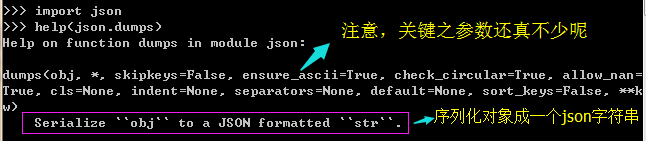

我们发现，虽然dumps函数的参数很多，但是必须的只有一个，那就是第一个参数obj，也就是要序列化的对象，一定要有，其余的参数都可以使用默认值

接着往下看

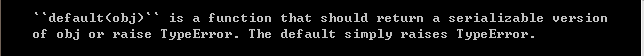

``default(obj)`` is a function that should return a serializable version  
of obj or raise TypeError. The default simply raises TypeError.  

意思就是，关键字参数default使用默认值（None）的时候，是针对当前对象obj（第一个参数）的，如果当前对象，可以被（支持）序列化，那就返回对象的可序列化版本（比如int就是int，{}就是dict，true就是True），另一种就是，不支持的时候，就会抛出TypeError的异常，所以，我们看到的builtins.TypeError: Object of type 'Employee' is not JSON serializable这句异常信息，实际上就是这个default引起的，我们既然没有类的对象对应的json序列化版本，那我们就去创造一个，它不是说了嘛，a function that that should return a serializable version of obj，那我们就为default指定一个函数：

In [7]:
def ToJson(obj):  
    return {  
    'name'  : obj.name,  
    'sex'   : obj.sex ,  
    'age'   : obj.age ,  
    'salary': obj.salary     
    }  
  
print(json.dumps(person,default=ToJson))    


{"name": "\u5f20\u4e09", "sex": "\u7537", "age": 35, "salary": 4560.0}


这样一来，函数dumps在序列化对象person的时候，就会按照ToJson函数的模板去构造属于person对象的json串

如果我们构造了三个Employee的实例怎么办，别慌，我们最开始不是说了json和python的基本数据类型对应关系吗，Pyhton的list集合对应json的[]（数组）,那我们就用Python的list来存放这三个实例，然后，将list作为要序列化的obj

In [13]:
person1 = Employee('张三','男',35,4560.00)  
person2 = Employee('李婷','女',28,3000.00)  
person3 = Employee('王五','男',45,7000.00)  
  
PList = []  
PList.append(person1)  
PList.append(person2)  
PList.append(person3)  
  
def ToJson(obj):  
    return {  
    "name"  : obj.name,  
    "sex"   : obj.sex ,  
    "age"   : obj.age ,  
    "salary": obj.salary     
    }  
  
# print(json.dumps(PList))  # 注意，因为PList中的元素是类类型的对象，因此，参数default如果不指定序列化转换规则的话，仍然会让dumps函数一脸懵逼

print(json.dumps(PList, default=ToJson)) 

[{"name": "\u5f20\u4e09", "sex": "\u7537", "age": 35, "salary": 4560.0}, {"name": "\u674e\u5a77", "sex": "\u5973", "age": 28, "salary": 3000.0}, {"name": "\u738b\u4e94", "sex": "\u7537", "age": 45, "salary": 7000.0}]


拿到这个JSON串后，你就可以对数据进行解析了，排版后的格式如下

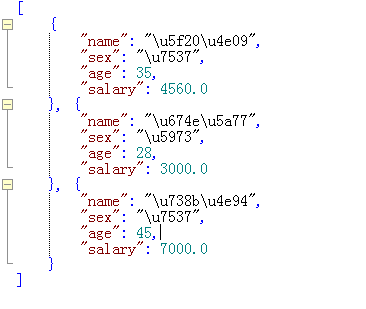

下面来看看如何将json串反序列化成对象

既然，我们dumps函数指定了序列化的转换函数，那么，我们的loads函数也要指定一下反序列化的转换函数，注意，前者是将对象按照指定的函数转化成json串，后者则是这项工作的逆向操作

In [14]:
#!/usr/bin/env Python3  
# -*- coding:utf-8 -*-  
  
import json  
  
class Employee:  
    def __init__(self,name,sex,age,salary):  
        self.name  = name  ;   #姓名  
        self.sex   = sex   ;  #性别   
        self.__age = age   ;  #年龄 私有变量   
        self.salary= salary;  #薪资 按月算      
    @property  
    def age(self):            #age的getter属性，还记得装饰器@property的用法吗？  
        return self.__age  
    @age.setter  
    def age(self,value):      #age的setter属性  
        self.__age = value  
  
person1 = Employee('张三','男',35,4560.00)  
person2 = Employee('李婷','女',28,3000.00)  
person3 = Employee('王五','男',45,7000.00)  
  
PList = []  
PList.append(person1)  
PList.append(person2)  
PList.append(person3)  
  
def ToJson(obj):  
    return {  
    "name"  : obj.name,  
    "sex"   : obj.sex ,  
    "age"   : obj.age ,  
    "salary": obj.salary     
    }  
  
def ToObject(d):  
    return Employee(d['name'],d['sex'],d['age'],d['salary'])  
jstr = json.dumps(PList,default=ToJson) #高阶函数  
print('{ "data":'+jstr+'}')  
#object_hook指向一个自定义解码器(函数)，解码器的对象就是json串中的{}，结果对应Python的dict  
#一层层的剥离出{}，向Python的dict靠拢  
L  = json.loads(jstr,object_hook=ToObject)   
print(L)  
for obj in L:  
    print(obj,'----->',obj.name)  

{ "data":[{"name": "\u5f20\u4e09", "sex": "\u7537", "age": 35, "salary": 4560.0}, {"name": "\u674e\u5a77", "sex": "\u5973", "age": 28, "salary": 3000.0}, {"name": "\u738b\u4e94", "sex": "\u7537", "age": 45, "salary": 7000.0}]}
[<__main__.Employee object at 0x0000029C43ECCD68>, <__main__.Employee object at 0x0000029C43ECC518>, <__main__.Employee object at 0x0000029C43ECC978>]
<__main__.Employee object at 0x0000029C43ECCD68> -----> 张三
<__main__.Employee object at 0x0000029C43ECC518> -----> 李婷
<__main__.Employee object at 0x0000029C43ECC978> -----> 王五
